<a href="https://colab.research.google.com/github/MaryMbugua109/MaryMbugua109/blob/main/MaryMbugua_PythonNotebook__IP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION

##i) Specifying the Question


As a football recruit under Mchezopesa Ltd, prdict the result of a game between tean A and team B, taking who's home, who's away and wheteher or not the game is friendly as your factors of interest. include rank in your training

## ii) Defining the Metric for Success

The project is successful if the analysis from models developed predicts the result of a game between any two teams.

##iii) Understanding the Context

Mchezopesa Ltd wishes to implement a model that can effectively predict the results of two teams for purposes of managing the amount of money that they will attach to bets from their customers.



##iv) Experimental Design

1. Perform EDA

2. Check for multicollinearity

3. Build the Polynomial Regression Model

4. Cross-validate the model

5. Create residual plots and test for heterescedasticity using Bartlett's test

6. Feaature engineering

7. Build the Logistic Regression Model

8. Hyperparameter tuning

#DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

In [2]:
#loading our datasets
fifa_ranking = pd.read_csv("/content/fifa_ranking.csv")
fifa_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [3]:
fifa_results = pd.read_csv("/content/results.csv")
fifa_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [4]:
#a look at the shape of the datasets
fifa_ranking.shape

(57793, 16)

In [5]:
fifa_results.shape

(40839, 9)

In [6]:
#datasets information
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [7]:
fifa_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [8]:
#a look at fifa_ranking head 
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [9]:
#tail
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [10]:
#fifa_results head
fifa_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
#tail
fifa_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


#DATA VALIDATION

In [12]:
fifa_ranking_valid = fifa_ranking[:1]
fifa_ranking_valid

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [13]:
fifa_ranking_valid1 = pd.read_html("https://en.wikipedia.org/wiki/1993_UEFA_Cup_Final")

#DATA CLEANING

In [14]:
#looking for null values
fifa_ranking.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [15]:
#looking for duplicates
fifa_ranking.duplicated().sum()

37

In [16]:
fifa_ranking[fifa_ranking.duplicated()]
#the duplicated data is from Sudan and there doesn't appear any errors within

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11
42366,113,Sudan,SDN,292.03,292,0,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-05-09
42562,101,Sudan,SDN,338.25,292,12,179.70,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,2012-06-06
42775,105,Sudan,SDN,329.36,338,-4,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-07-04
42983,104,Sudan,SDN,329.36,329,1,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-08-08
43193,103,Sudan,SDN,331.79,329,1,169.05,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,2012-09-05


In [17]:
#results missing values
fifa_results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [18]:
#results duplicates
fifa_results.duplicated().sum()

0

##Merging the datasets

In [19]:
fifa_ranking.head(1)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [20]:
fifa_rankingdf = fifa_ranking.drop(columns=['country_abrv','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted','confederation'])
fifa_rankingdf

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08
...,...,...,...
57788,206,Anguilla,2018-06-07
57789,206,Bahamas,2018-06-07
57790,206,Eritrea,2018-06-07
57791,206,Somalia,2018-06-07


In [21]:
#we have to convert rank_ddate to a dtaetime
fifa_rankingdf.rank_date = pd.to_datetime(fifa_rankingdf.rank_date)
fifa_rankingdf.head(5)

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [22]:
fifa_rankingdf.tail()

,rank,country_full,rank_date
57788,206,Anguilla,2018-06-07
57789,206,Bahamas,2018-06-07
57790,206,Eritrea,2018-06-07
57791,206,Somalia,2018-06-07
57792,206,Tonga,2018-06-07


In [23]:
fifa_rankingdf['year'] = fifa_rankingdf['rank_date'].dt.year
fifa_rankingdf.tail(10)
#the last year is 2018

,rank,country_full,rank_date,year
57783,202,Cayman Islands,2018-06-07,2018
57784,203,San Marino,2018-06-07,2018
57785,204,British Virgin Islands,2018-06-07,2018
57786,204,Montserrat,2018-06-07,2018
57787,206,Turks and Caicos Islands,2018-06-07,2018
57788,206,Anguilla,2018-06-07,2018
57789,206,Bahamas,2018-06-07,2018
57790,206,Eritrea,2018-06-07,2018
57791,206,Somalia,2018-06-07,2018
57792,206,Tonga,2018-06-07,2018


In [24]:
#let's have a look at our fifa_results dataset
fifa_results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [25]:
#converting the date to a datetime
fifa_results.date = pd.to_datetime(fifa_results.date)
fifa_results['year'] = fifa_results['date'].dt.year
fifa_results.tail(5)
#the last entries for our results dataset is 2019

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,2019
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,2019
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,2019


In [26]:
#dropping all entries beyond 2018 in order to merge our datasets
fifa_results1 = fifa_results[fifa_results.year < 2019]
fifa_results1.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018


In [27]:
#fifa ranking considers last four years therefore we'll be using four years worth of data
fifa_results1 = fifa_results1[fifa_results1.year > 2014]
fifa_results1.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
36609,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015
36610,2015-01-04,Iran,Iraq,1,0,Friendly,Wollongong,Australia,True,2015
36611,2015-01-04,South Korea,Saudi Arabia,2,0,Friendly,Parramatta,Australia,True,2015
36612,2015-01-04,South Africa,Zambia,1,0,Friendly,Johannesburg,South Africa,False,2015
36613,2015-01-05,China PR,Oman,4,1,Friendly,Penrith,Australia,True,2015
36614,2015-01-07,Cameroon,DR Congo,1,1,Friendly,Yaoundé,Cameroon,False,2015
36615,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,2015
36616,2015-01-09,Senegal,Gabon,1,0,Friendly,Casablanca,Morocco,True,2015
36617,2015-01-10,Burkina Faso,Eswatini,5,1,Friendly,Nelspruit,South Africa,True,2015
36618,2015-01-10,Cameroon,South Africa,1,1,Friendly,Libreville,Gabon,True,2015


In [28]:
#merging the sets
fifa_merged = fifa_results1.merge(fifa_rankingdf, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
fifa_merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,country_full,rank_date
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08
1,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,103,Bahrain,2015-02-12
2,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,104,Bahrain,2015-03-12
3,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,108,Bahrain,2015-04-09
4,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,108,Bahrain,2015-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34307,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,Juba,South Sudan,False,2018,153,South Sudan,2018-02-15
34308,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,Juba,South Sudan,False,2018,154,South Sudan,2018-03-15
34309,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,Juba,South Sudan,False,2018,155,South Sudan,2018-04-12
34310,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,Juba,South Sudan,False,2018,157,South Sudan,2018-05-17


In [29]:

fifa_merged = fifa_merged.merge(fifa_rankingdf, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
fifa_merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,93,Jordan,2015-01-08
1,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,97,Jordan,2015-02-12
2,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,101,Jordan,2015-03-12
3,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,103,Jordan,2015-04-09
4,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,103,Jordan,2015-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347875,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Lomé,Togo,False,2018,125,Togo,2018-06-07,163,Gambia,2018-02-15
347876,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Lomé,Togo,False,2018,125,Togo,2018-06-07,164,Gambia,2018-03-15
347877,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Lomé,Togo,False,2018,125,Togo,2018-06-07,175,Gambia,2018-04-12
347878,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Lomé,Togo,False,2018,125,Togo,2018-06-07,175,Gambia,2018-05-17


In [30]:
#dropping unnecessary columns
fifa_merged = fifa_merged.drop(columns=['city', 'country', 'neutral', 'year', 'country_full_x', 'country_full_y'])

fifa_merged = fifa_merged[fifa_merged.rank_date_x == fifa_merged.rank_date_y]
fifa_merged

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,rank_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
13,2015-01-04,Bahrain,Jordan,1,0,Friendly,103,2015-02-12,97,2015-02-12
26,2015-01-04,Bahrain,Jordan,1,0,Friendly,104,2015-03-12,101,2015-03-12
39,2015-01-04,Bahrain,Jordan,1,0,Friendly,108,2015-04-09,103,2015-04-09
52,2015-01-04,Bahrain,Jordan,1,0,Friendly,108,2015-05-07,103,2015-05-07
...,...,...,...,...,...,...,...,...,...,...
347851,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-02-15,163,2018-02-15
347858,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-03-15,164,2018-03-15
347865,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,129,2018-04-12,175,2018-04-12
347872,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-05-17,175,2018-05-17


In [31]:
#duplicates
fifa_merged.duplicated(subset=['date','home_team','away_team','home_score','away_score','tournament']).sum()

28124

In [32]:
#keeping only the first entry of each match
fifa_merged.drop_duplicates(subset=['date','home_team','away_team','home_score','away_score','tournament'], keep= 'first', inplace= True)
fifa_merged

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,rank_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,2015-01-08,93,2015-01-08
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,2015-01-08,93,2015-01-08
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,2015-01-08,93,2015-01-08
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,2015-01-08,93,2015-01-08
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,2018-01-18,143,2018-01-18
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,2018-01-18,143,2018-01-18
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,2018-01-18,143,2018-01-18
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,2018-01-18,153,2018-01-18


In [33]:
#renaming columns for better understanding
fifa_merged.rename(columns={'rank_x':'home_team_rank', 'rank_y':'away_team_rank'},inplace=True)
fifa_merged

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,away_team_rank,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,2015-01-08,93,2015-01-08
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,2015-01-08,93,2015-01-08
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,2015-01-08,93,2015-01-08
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,2015-01-08,93,2015-01-08
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,2018-01-18,143,2018-01-18
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,2018-01-18,143,2018-01-18
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,2018-01-18,143,2018-01-18
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,2018-01-18,153,2018-01-18


In [34]:
#changing tournament type to binary numbers
fifa_merged.tournament.nunique()

32

In [35]:
#reduce the 32 unique entries into the 5 standard ny fifa 
def Tourna(Match):
  if Match == Match == 'FIFA World Cup':
    return 5
  elif Match == 'FIFA World Cup qualification':
    return 4
  elif Match == 'Confederations Cup':
    return 3
  elif Match == 'Friendly':
    return 1
  else:
    return 2

fifa_merged['competition'] = fifa_merged['tournament'].apply(lambda x: Tourna(x))
fifa_merged['competition'].unique()

array([1, 2, 4, 3, 5])

In [36]:
#dropping off more unnecessary columns
fifa_merged = fifa_merged.drop(columns=['rank_date_x', 'rank_date_y'])

#EXPLORATORY DATA ANALYSIS

In [37]:
fifa_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 347844
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2942 non-null   datetime64[ns]
 1   home_team       2942 non-null   object        
 2   away_team       2942 non-null   object        
 3   home_score      2942 non-null   int64         
 4   away_score      2942 non-null   int64         
 5   tournament      2942 non-null   object        
 6   home_team_rank  2942 non-null   int64         
 7   away_team_rank  2942 non-null   int64         
 8   competition     2942 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 229.8+ KB


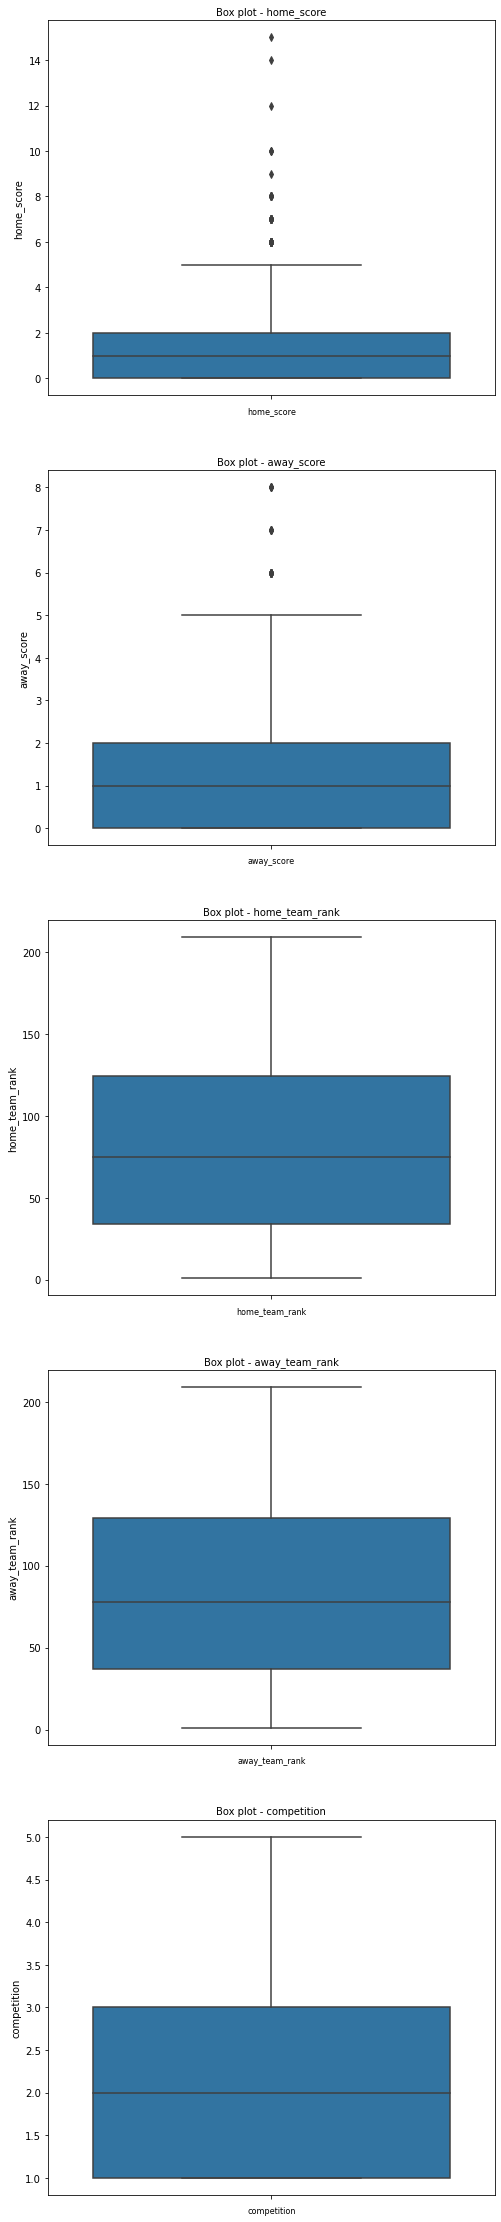

In [38]:
col_names = ['home_score','away_score', 'home_team_rank', 'away_team_rank', 'competition']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = fifa_merged[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [39]:
#home score measures of central tendency and dispersion
print(f'Min: {fifa_merged.home_score.min()}')
print(f'Q1: {fifa_merged.home_score.quantile(.25)}')
print(f'Q2: {fifa_merged.home_score.quantile(.50)}')
print(f'Q3: {fifa_merged.home_score.quantile(.75)}')
print(f'Max: {fifa_merged.home_score.max()}')
print('*'*15)

print(f'Mean: {fifa_merged.home_score.mean()}')
print(f'Median: {fifa_merged.home_score.median()}')
print(f'Mode: {fifa_merged.home_score.mode().values[0]}')
print('*'*15)

print(f'Skew: {fifa_merged.home_score.skew()}')
print(f'Kurtosis: {fifa_merged.home_score.kurt()}')

Min: 0
Q1: 0.0
Q2: 1.0
Q3: 2.0
Max: 15
***************
Mean: 1.5268524813052344
Median: 1.0
Mode: 1
***************
Skew: 1.8233277386031004
Kurtosis: 6.786910768576313


In [40]:
#away score measures of central tendency and dispersion
print(f'Min: {fifa_merged.away_score.min()}')
print(f'Q1: {fifa_merged.away_score.quantile(.25)}')
print(f'Q2: {fifa_merged.away_score.quantile(.50)}')
print(f'Q3: {fifa_merged.away_score.quantile(.75)}')
print(f'Max: {fifa_merged.away_score.max()}')
print('*'*15)

print(f'Mean: {fifa_merged.away_score.mean()}')
print(f'Median: {fifa_merged.away_score.median()}')
print(f'Mode: {fifa_merged.away_score.mode().values[0]}')
print('*'*15)

print(f'Skew: {fifa_merged.away_score.skew()}')
print(f'Kurtosis: {fifa_merged.away_score.kurt()}')

Min: 0
Q1: 0.0
Q2: 1.0
Q3: 2.0
Max: 8
***************
Mean: 1.0418082936777702
Median: 1.0
Mode: 0
***************
Skew: 1.6540273817725424
Kurtosis: 4.033501382357347


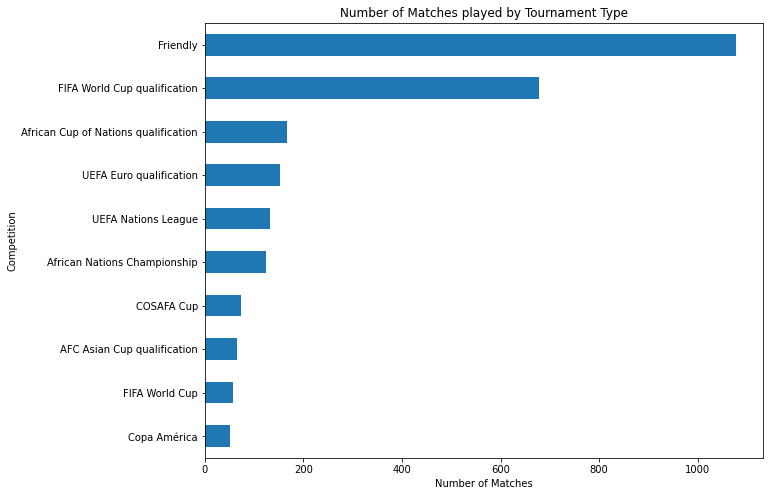

In [41]:
#Tournaments Top 10
plt.figure(figsize = [10,8])
top_10 = fifa_merged['tournament'].value_counts().sort_values(ascending=False).head(10)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Matches')
plt.ylabel('Competition')
plt.title('Number of Matches played by Tournament Type')
plt.show()

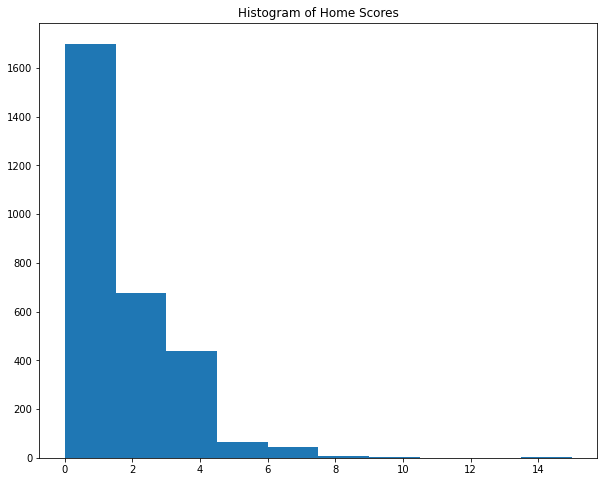

In [42]:
#Histogram of home scores
plt.figure(figsize = [10,8])
plt.hist(fifa_merged['home_score'])
plt.title('Histogram of Home Scores')
plt.show()

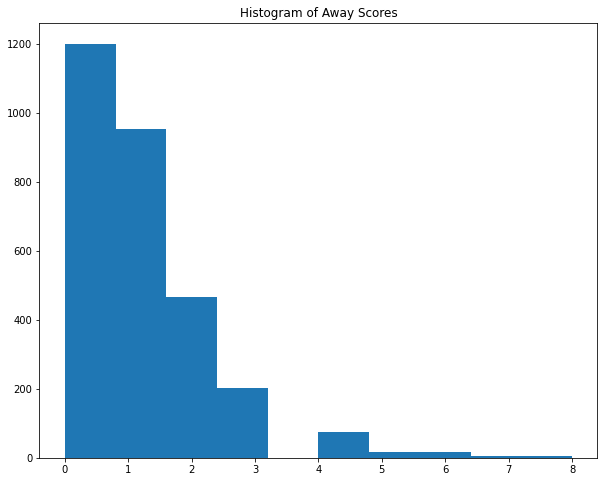

In [43]:
#Histogram of away scores
plt.figure(figsize = [10,8])
plt.hist(fifa_merged['away_score'])
plt.title('Histogram of Away Scores')
plt.show()

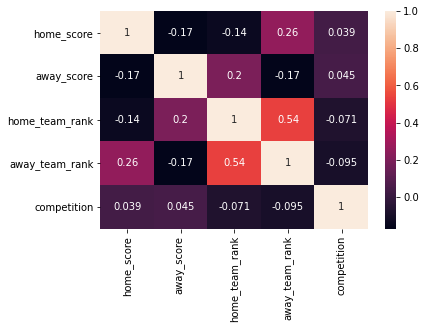

In [44]:
#games correlation heatmap
sns.heatmap(fifa_merged.corr(),annot=True)
plt.show()

In [45]:
#summary statistics
fifa_merged.describe()

,home_score,away_score,home_team_rank,away_team_rank,competition
count,2942.000000,2942.000000,2942.000000,2942.000000,2942.000000
mean,1.526852,1.041808,82.706322,85.820190,2.158396
std,1.515799,1.211115,56.652920,56.713522,1.202144
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,34.000000,37.000000,1.000000
50%,1.000000,1.000000,75.000000,78.000000,2.000000
75%,2.000000,2.000000,124.000000,129.000000,3.000000
max,15.000000,8.000000,209.000000,209.000000,5.000000


##A) POLYNOMIAL REGRESSION MODEL

##MODEL 1

###checking multicolinearity


In [46]:
fifa_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,1
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,1
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,2
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,2
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,4


In [47]:
#using home_score as the dependent variable, let's prdeict number of goals scored by the home team
independent_home_goals = fifa_merged.drop(columns=['date', 'home_team', 'away_team', 'home_score', 'tournament'])
correlated_home_goals = independent_home_goals.corr()
correlated_home_goals

,away_score,home_team_rank,away_team_rank,competition
away_score,1.000000,0.196961,-0.170409,0.045194
home_team_rank,0.196961,1.000000,0.535766,-0.071270
away_team_rank,-0.170409,0.535766,1.000000,-0.095467
competition,0.045194,-0.071270,-0.095467,1.000000


In [48]:
#computing the VIF scores
pd.DataFrame(np.linalg.inv(correlated_home_goals.values), index = correlated_home_goals.index, 
             columns=correlated_home_goals.columns)

,away_score,home_team_rank,away_team_rank,competition
away_score,1.172299,-0.475220,0.450189,-0.043872
home_team_rank,-0.475220,1.596059,-0.931677,0.046284
away_team_rank,0.450189,-0.931677,1.582014,0.064284
competition,-0.043872,0.046284,0.064284,1.011418


all the VIF scores are below 5, hence there is little multicolinearity in our data

###Building the model

In [49]:
X = independent_home_goals.values
y = fifa_merged['home_score'].values

# Split the dataset into train and test sets
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [50]:
#using 3 degrees of freedom
poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly_3 = poly_reg_3.fit_transform(X)

pol_3_reg = LinearRegression()
pol_3_reg.fit(X_poly_3, y)

y_pred_3 = pol_3_reg.predict(poly_reg_3.fit_transform(X_test))

In [51]:
#testing using 4 degrees of freedom
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly_4 = poly_reg_4.fit_transform(X)

pol_4_reg = LinearRegression()
pol_4_reg.fit(X_poly_4, y)

y_pred_4 = pol_4_reg.predict(poly_reg_4.fit_transform(X_test))

In [52]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))

Root Mean Squared Error: 1.3972937526881384
Root Mean Squared Error: 1.3749325221645692
Root Mean Squared Error: 1.3606882100438071


we have 4 features. It therefore is prudent to use the 4 degrees of freedom as iit has the lowest RMSE. this also reduces chances of overfitting and underfitting our model

###Cross-validating the model

In [53]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] #keeping track of RSME in each model
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # setting of train and test as per the Kfold
  # 80% in the training set, 20% in test test
  Xc_train, Xc_test = X[train_index], X[test_index]
  yc_train, yc_test = y[train_index], y[test_index]
  
  # fitting a model
  regressor = LinearRegression()  
  regressor.fit(Xc_train, yc_train)
  
  # this will sesses the accuracy of the model fitted
  yc_pred = regressor.predict(Xc_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(yc_test, yc_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4381986573408163

Training model 2
Model 2 Root Mean Squared Error: 1.3784592138973437

Training model 3
Model 3 Root Mean Squared Error: 1.2871880202470884

Training model 4
Model 4 Root Mean Squared Error: 1.4725249581701463

Training model 5
Model 5 Root Mean Squared Error: 1.3184329306184097


In [54]:

np.mean(RMSES)

1.3789607560547608

The avaerage RMSE is very closely related to the inital RMSE chosen above. Model 3 however has the least RMSE in this case so that's what we are going with

###Residual plots and heteroscedasticity - Bartlett's test

In [55]:
residuals_home_score = np.subtract(y_pred_4, y_test)

pd.DataFrame(residuals_home_score).describe()

,0
count,589.000000
mean,-0.052173
std,1.360843
min,-9.886287
25%,-0.725743
50%,0.109383
75%,0.828980
max,3.343042


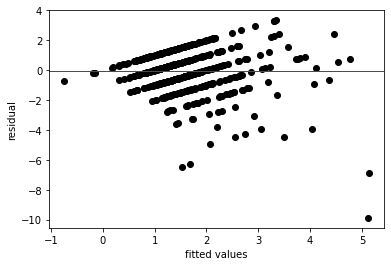

In [56]:
plt.scatter(y_pred_4, residuals_home_score, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals_home_score.mean(), color='red', linewidth=1)
plt.show()

there is a centered residual about the mean, close to 0. It shows the model is good

In [57]:
#performing the heteroscedasticity test 
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_4, residuals_home_score)

# computing a chi squared distribution critical value
degree_of_freedom = len(y_pred_4)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


##MODEL 2

###Checking multicolinearity

In [58]:
# Model 2: predicting how many goals the home team scores depending on the away_score

independent_away_goals = fifa_merged.drop(columns=['date', 'home_team', 'away_team', 'away_score', 'tournament'])
correlated_away_goals = independent_away_goals.corr()
correlated_away_goals

,home_score,home_team_rank,away_team_rank,competition
home_score,1.000000,-0.135260,0.256419,0.038530
home_team_rank,-0.135260,1.000000,0.535766,-0.071270
away_team_rank,0.256419,0.535766,1.000000,-0.095467
competition,0.038530,-0.071270,-0.095467,1.000000


In [59]:
# computing the VIF scores
pd.DataFrame(np.linalg.inv(correlated_away_goals.values), index = correlated_away_goals.index, 
             columns=correlated_away_goals.columns)

,home_score,home_team_rank,away_team_rank,competition
home_score,1.209337,0.460555,-0.563296,-0.067548
home_team_rank,0.460555,1.578812,-0.963704,0.002775
away_team_rank,-0.563296,-0.963704,1.671509,0.112595
competition,-0.067548,0.002775,0.112595,1.013549


All the VIF scores are below 5, hence this data has minimal colinearity

###Building the model

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

A = independent_away_goals.values
b = fifa_merged['away_score'].values

# Split the dataset into train and test sets
A_train, A_test, b_train, b_test = train_test_split(A,b, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
A_poly = poly_reg.fit_transform(A)

pol_reg = LinearRegression()
pol_reg.fit(A_poly, b)

b_pred = pol_reg.predict(poly_reg.fit_transform(A_test))

In [61]:
poly_reg_3 = PolynomialFeatures(degree = 3) 
A_poly_3 = poly_reg_3.fit_transform(A)

pol_3_reg = LinearRegression()
pol_3_reg.fit(A_poly_3, b)

b_pred_3 = pol_3_reg.predict(poly_reg_3.fit_transform(A_test))

In [62]:
poly_reg_4 = PolynomialFeatures(degree = 4) 
A_poly_4 = poly_reg_4.fit_transform(A)

pol_4_reg = LinearRegression()
pol_4_reg.fit(A_poly_4, b)

b_pred_4 = pol_4_reg.predict(poly_reg_4.fit_transform(A_test))

In [63]:

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred_3)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred_4)))

Root Mean Squared Error: 1.0538279527356949
Root Mean Squared Error: 1.0518691429564835
Root Mean Squared Error: 1.0498697935683117


we have 4 features. It therefore is prudent to use the 4 degrees of freedom as iit has the lowest RMSE. this also reduces chances of overfitting and underfitting our model

###Cross-validating the model

In [64]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] #keeping track of RSME in each model
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # setting of train and test as per the Kfold
  # 80% in the training set, 20% in test test
  Ac_train, Ac_test = A[train_index], X[test_index]
  bc_train, bc_test = b[train_index], y[test_index]
  
  # fitting a model
  regressor = LinearRegression()  
  regressor.fit(Xc_train, yc_train)
  
  # this will sesses the accuracy of the model fitted
  bc_pred = regressor.predict(Ac_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(bc_test, bc_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4369747141895637

Training model 2
Model 2 Root Mean Squared Error: 1.3738603751416467

Training model 3
Model 3 Root Mean Squared Error: 1.2855815520916838

Training model 4
Model 4 Root Mean Squared Error: 1.4677446353194346

Training model 5
Model 5 Root Mean Squared Error: 1.3184329306184097


In [65]:
np.mean(RMSES)

1.3765188414721476

The average RMSE is very close to the initial value. We are going to be going with model 2 as it has the least RMSE and closer to the polynomial model degree of 4

###Residual plots and heteroscedasticity using Bartlett's test

In [66]:
residuals_away_score = np.subtract(b_pred_4, b_test)

pd.DataFrame(residuals_away_score).describe()

,0
count,589.000000
mean,-0.022598
std,1.050519
min,-3.960246
25%,-0.631214
50%,0.072672
75%,0.789596
max,3.231230


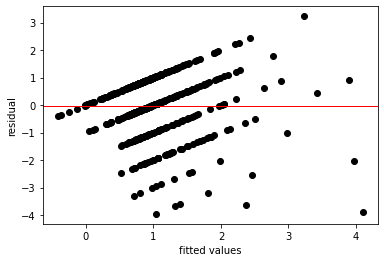

In [67]:
plt.scatter(b_pred_4, residuals_away_score, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals_away_score.mean(), color='red', linewidth=1)
plt.show()

there is a centered residual about the mean, close to 0. It shows the model is good

In [68]:
#performing the heteroscedasticity test 
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_4, residuals_home_score)

# computing a chi squared distribution critical value
degree_of_freedom = len(y_pred_4)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


model 2 can predict the home team goals very sufficiently. the variance after cross-validation are homogenous. This is a good model

##LOGISTIC REGRESSION MODEL

###Feature Engineering

In [69]:
fifa_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,1
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,1
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,2
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,2
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,4


In [70]:
#figuring out the outcomes of a game. Is it a win, lose or draw
def match_result(row):
  if row['home_score'] > row['away_score']:
    outcome = 'Win'
  elif row['home_score'] < row['away_score']:
    outcome = 'Lose'
  else:
    outcome = 'Draw'
  return outcome

fifa_merged['result'] = fifa_merged.apply(match_result, axis=1)
fifa_merged

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition,result
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,1,Win
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,1,Win
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,2,Win
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,2,Lose
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,4,Lose
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,143,1,Draw
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,143,2,Draw
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,143,2,Lose
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,153,2,Win


In [71]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
fifa_merged['result'] = labelencoder.fit_transform(fifa_merged['result'])
fifa_merged

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition,result
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,1,2
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,1,2
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,2,2
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,2,1
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,4,1
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,143,1,0
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,143,2,0
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,143,2,1
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,153,2,2


###Building the model

In [72]:
C = fifa_merged.drop(columns= ['date',	'home_team',	'away_team', 'tournament', 'result'])
d = fifa_merged['result']

from sklearn.model_selection import train_test_split
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size = .2, random_state=20)

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(C_train, d_train)

d_pred = LogReg.predict(C_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(d_test, d_pred)
confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[136,   0,   0],
       [  0, 167,   0],
       [  0,   0, 286]])

###Hyperparameter testing

In [73]:
# as per warning above
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(C_train, d_train)
C_train = scaler.transform(C_train)

#logistic regression to improve the regression 


logistic = linear_model.LogisticRegression()

In [74]:

# regularization penalty space
penalty = ['l1', 'l2']

# regularization hyperparameter space
hyp_C = np.logspace(0, 4, 10)

solver = [ 'liblinear', 'sag', 'saga']

#hyperparameter options
hyperparameters = dict(C=hyp_C, penalty=penalty, solver = solver, max_iter = (10,100))

# grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fitting grid search
best_model = clf.fit(C_train, d_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [75]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter'])

Best Penalty: l1
Best C: 1.0
Best Solver: saga
Best max_iter: 10


In [76]:
# Predict target vector
best_model.predict(C)

array([2, 2, 2, ..., 1, 2, 2])

In [77]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression().fit(X_train,y_train)
metrics.accuracy_score(d_test, d_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0

In [78]:
logistic = linear_model.LogisticRegression(penalty='l1', C=1, max_iter=10, solver='saga').fit(C_train,d_train)

dc_pred = logistic.predict(C_test)
metrics.accuracy_score(d_test, dc_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7317487266553481

In [79]:

best_model.best_score_

1.0

there is a 100% accuracy with this model. the c=1 and L1 penalty are our best parameters

#CONCLUSION

 The Logistic regression was able to provide a 100% accuracy since it was able to predict and categorise the results as either a win, loss or a draw. 

The data provided was right for this project. We had to drop a few duplicates in order to work with the right entries.

Extra information may not be necessary as what is provided in the datasets was adequate for the project at hand. 

The question was indeed interesting. Game predictions are useful to people and companies who place bets on playing teams